In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sb
import scvelo as scv
import cellrank as cr
import matplotlib.patches as mpatches

# Some custom functions
import ma_codes as codes
from ma_codes import mysize, mymap
folder = "/mnt/platte_1/Projects/230721_HLCA_Lin/"
sc.settings.figdir = folder + "Plots/Lin/"
sc.set_figure_params(vector_friendly=True, dpi_save=150)

#folder = "/media/agando/206c956b-9fe0-492c-b181-e920c87f2401/Projects/<project_folder>/"

sc.settings.verbosity = 2               # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_version_and_date()

Running Scanpy 1.8.1, on 2023-08-02 16:41.


In [2]:
#load
Endocells = sc.read(folder + "Endocells.h5ad")

In [3]:
bject_dir = "/mnt/platte_1/Projects/230721_HLCA_Lin/"

In [4]:
Endocells.obsm['X_umap']

array([[ -8.199142  ,  -0.7402105 ],
       [ -9.22475   ,   2.909061  ],
       [ -7.9915547 ,  -0.44338527],
       ...,
       [ -4.8648314 ,  -8.222798  ],
       [ -9.586172  ,   1.380499  ],
       [-10.408756  ,   0.8544202 ]], dtype=float32)

In [5]:
Endocells

AnnData object with n_obs × n_vars = 156585 × 56295
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'smoking_status', 'study', 'subject_type', 'tissue_coarse_unharmonized', '

In [81]:
Endocells.obs.columns

Index(['suspension_type', 'donor_id', 'is_primary_data',
       'assay_ontology_term_id', 'cell_type_ontology_term_id',
       'development_stage_ontology_term_id', 'disease_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id',
       'organism_ontology_term_id', 'sex_ontology_term_id', '3'_or_5'', 'BMI',
       'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score',
       'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1',
       'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5',
       'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen',
       'log10_total_counts', 'lung_condition', 'mixed_ancestry',
       'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3',
       'original_ann_level_4', 'original_ann_level_5',
       'original_ann_nonharmonized', 'reannotation_type', 'sample',
       'scanvi_label', 'sequencing_platform', 'smoking_status', 'study',
       'su

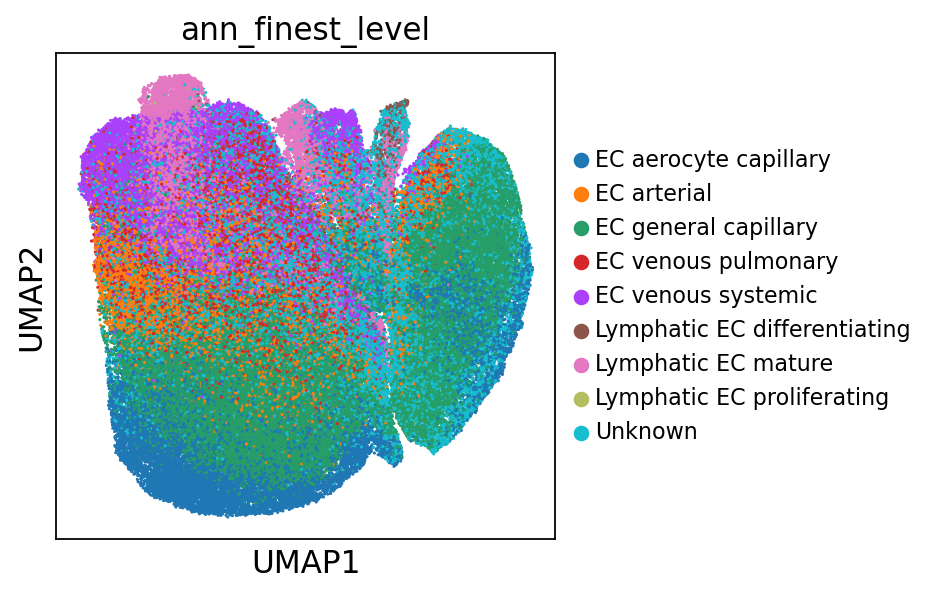

In [61]:
sc.pl.umap(Endocells, color = ["ann_finest_level"],  cmap=mymap, wspace = 2, size=8,legend_loc="right margin", legend_fontsize = 10)#, groups = ["PBS"])

In [8]:
Endocells.obs['ann_finest_level']

ATTCTACCAAGGTTCT_HD68                          EC aerocyte capillary
CTGATAGTCTTAGAGC_F01367                                  EC arterial
ILD57_ACTGCTCAGTTATCGC_haberman                EC aerocyte capillary
LAP92_TGTCCTGGTGTAAACA-1_duong                           EC arterial
GGCTGGTTCTTAACCT_F01851                          Lymphatic EC mature
                                                       ...          
P3_7_GAGCAGATCGGCTTGG                                    EC arterial
TCCCGATCATACGCCG_F02528                         EC general capillary
ACCTTTAAGGGATACC_F02611                          Lymphatic EC mature
TCTTCGGAGCAGACTG-WSSS8062679-0_meyer_unpubl     EC general capillary
ACACCAACAAGACAC_GRO-03_biopsy                   EC general capillary
Name: ann_finest_level, Length: 156585, dtype: category
Categories (9, object): ['EC aerocyte capillary', 'EC arterial', 'EC general capillary', 'EC venous pulmonary', ..., 'Lymphatic EC differentiating', 'Lymphatic EC mature', 'Lymphatic EC

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:12)
computing UMAP
    finished (0:00:54)


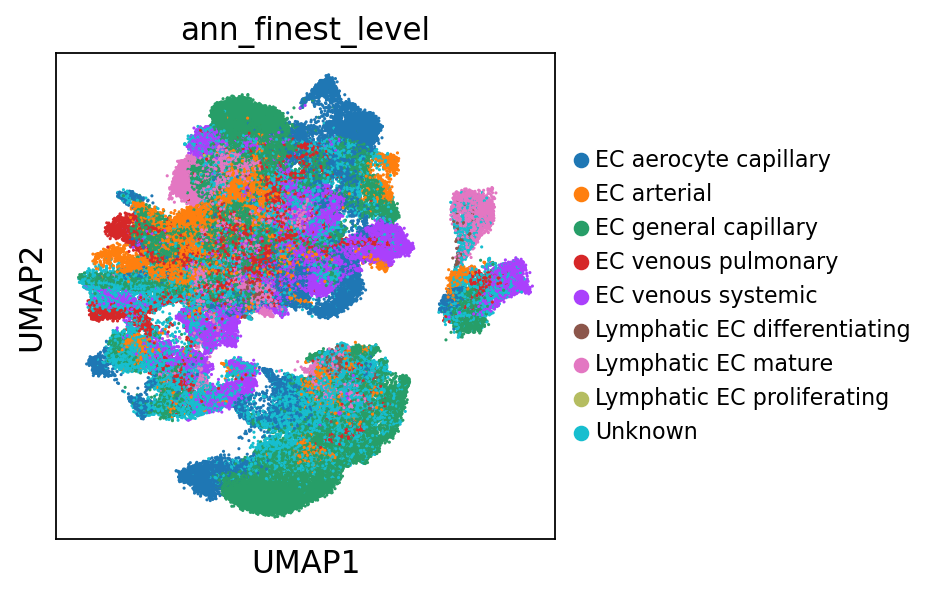

In [51]:
# Assuming you have an AnnData object named 'Endocells'
# Set the desired number of components (e.g., 3 for a 3D UMAP plot)
n_components = 3

# Assuming you have defined 'mymap' as your custom colormap
# Replace 'mymap' with the actual name of your colormap

# Run the UMAP algorithm to calculate the UMAP embedding with the desired number of components
sc.pp.neighbors(Endocells, n_neighbors=10)  # Adjust the number of neighbors based on your dataset
sc.tl.umap(Endocells, n_components=n_components)

# Plot the UMAP visualization using the calculated UMAP embedding
sc.pl.umap(Endocells, color=['ann_finest_level'], cmap=mymap, wspace=2, size=8, legend_fontsize=10)

In [52]:
import scanpy as sc

# Assuming 'Endocells' is your AnnData object
# Set the number of PCA components you want to compute (e.g., n_comps=4)
sc.tl.pca(Endocells, n_comps=4)

computing PCA
    with n_comps=4
    finished (0:00:20)


In [77]:
# Assuming you want to use PCA3 and PCA4 for the UMAP calculation
# Extract the desired PCA components (0-indexed) from the `.obsm['X_pca']` attribute
pca_components = Endocells.obsm['X_pca'][:, [2, 3]]

# Run the UMAP algorithm using the extracted PCA components
sc.pp.neighbors(Endocells, n_neighbors=10, use_rep='X_pca')  # Adjust the number of neighbors based on your dataset
sc.tl.umap(Endocells, init_pos=pca_components)

computing neighbors
    finished (0:00:12)
computing UMAP
    finished (0:00:26)


<Figure size 1440x960 with 0 Axes>

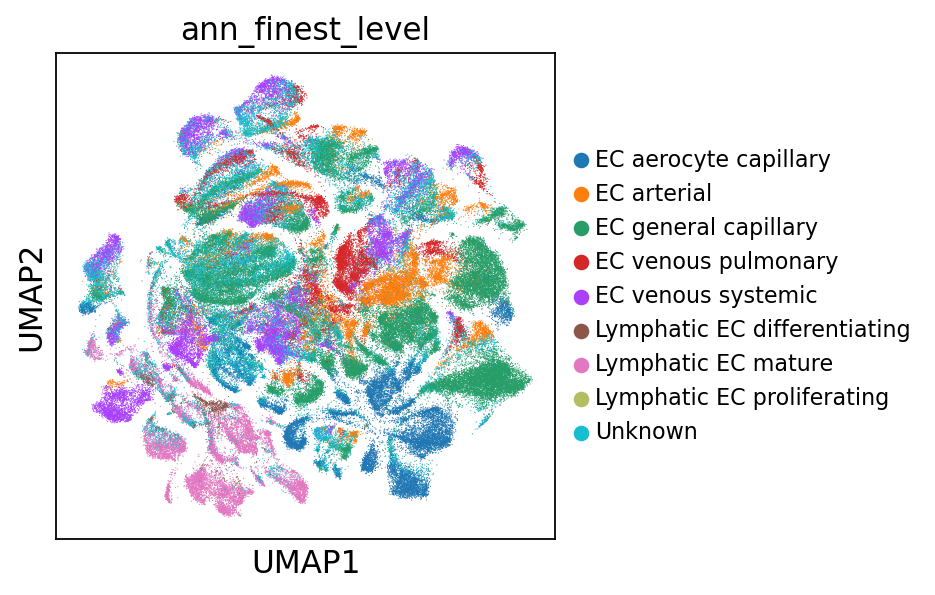

In [78]:
width = 18
height = 12

# Set the figure size before calling the sc.pl.umap function
plt.figure(figsize=(width, height))

# Plot the UMAP visualization using the calculated UMAP embedding
sc.pl.umap(Endocells, color=['ann_finest_level'], cmap=mymap, size=1, legend_fontsize=10)

computing PCA
    with n_comps=50
    finished (0:01:51)


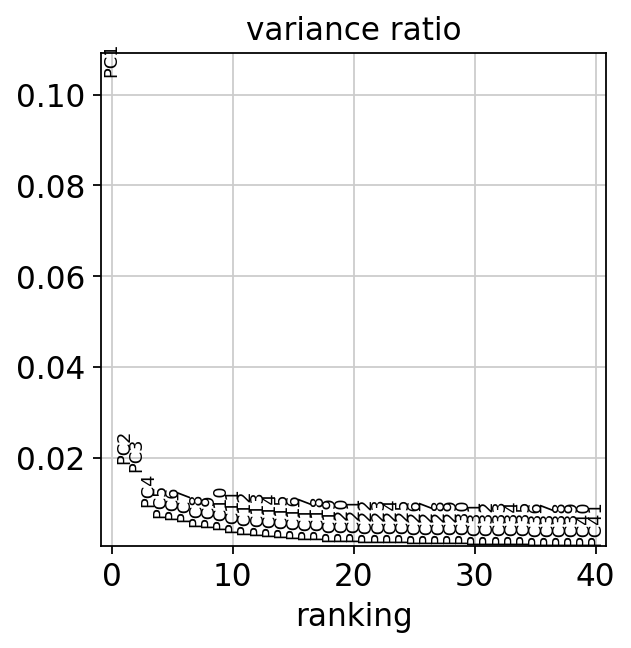

In [60]:
sc.pp.pca(Endocells, n_comps = 50)
sc.pl.pca_variance_ratio(Endocells, n_pcs = 40)

In [10]:
Endocells.obs["dcluster"] = codes.tidy_up(Endocells.obsm["X_umap"], min_samples = 50)
Endocells

AnnData object with n_obs × n_vars = 156585 × 56295
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'smoking_status', 'study', 'subject_type', 'tissue_coarse_unharmonized', '

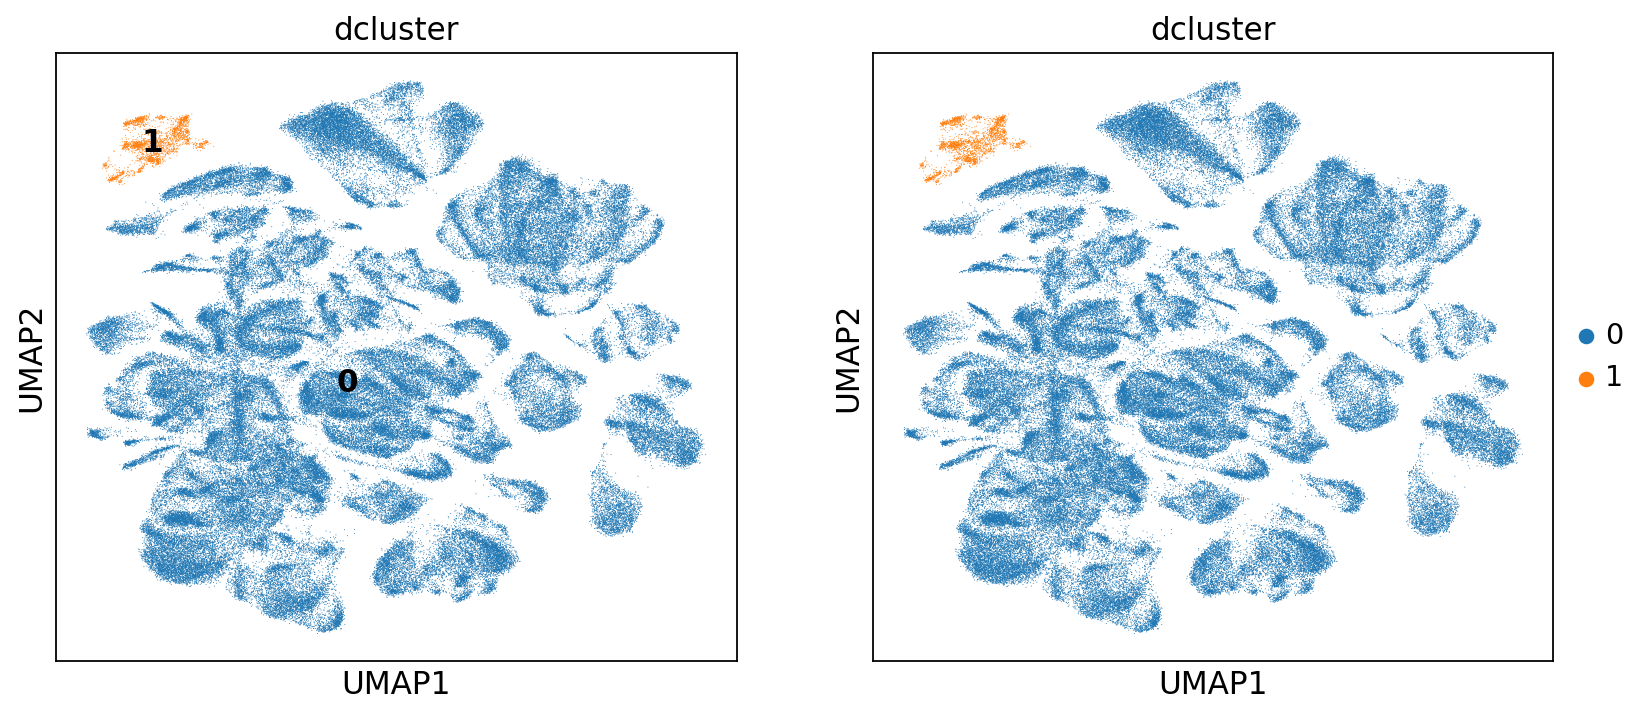

In [51]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(12, 5))
sc.pl.umap(Endocells, color = ["dcluster"], ax = ax[0], legend_loc = "on data", show = False)
Endocells = Endocells[Endocells.obs.dcluster.isin(["0", "1"])].copy()
sc.pl.umap(Endocells, color = ["dcluster"], ax = ax[1], show = False)
plt.show()

In [23]:
sc.pp.pca(Endocells)
sc.pp.neighbors(Endocells, n_pcs = 40, n_neighbors = 20)
sc.tl.louvain(Endocells, key_added = "sub_louvain")
sc.tl.umap(Endocells)

computing PCA
    with n_comps=50
    finished (0:01:50)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:33)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:37)
computing UMAP
    finished (0:01:06)


running Leiden clustering
    finished (0:00:25)


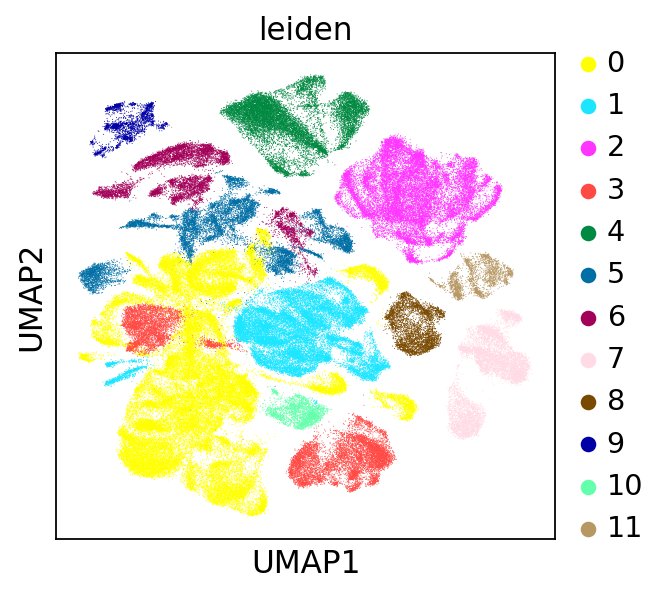

In [32]:
sc.tl.leiden(Endocells, resolution=0.05, key_added="leiden")
sc.pl.umap(Endocells, color = ["leiden"], cmap=mymap)


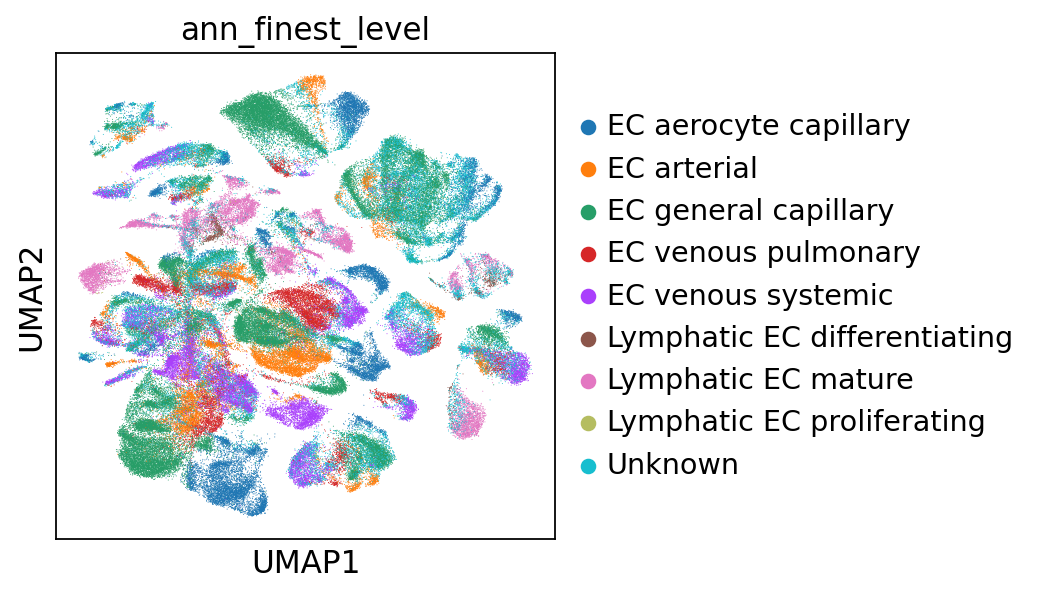

In [33]:
sc.pl.umap(Endocells, color = ['ann_finest_level'])

In [ ]:
sc.pp.neighbors(Endocells, n_comps = 10, use_rep='X')

In [16]:
sc.tl.diffmap(Endocells)

ValueError: You need to run `pp.neighbors` first to compute a neighborhood graph.

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:12)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:29)
computing UMAP
    finished (0:01:18)


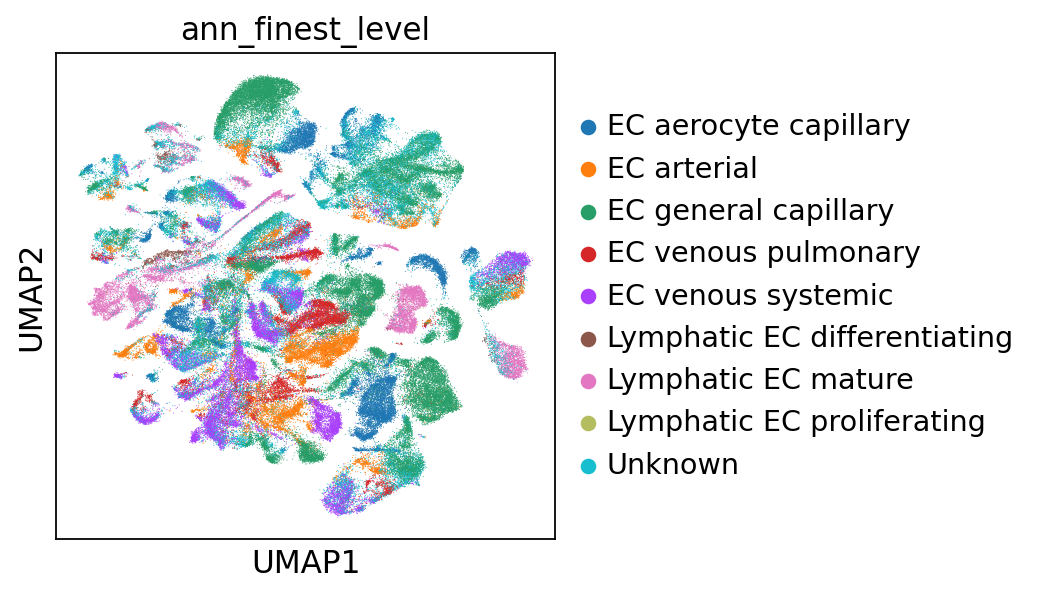

In [17]:
sc.pp.neighbors(Endocells, n_pcs = 40, n_neighbors = 10)
sc.tl.louvain(Endocells, resolution = 4)
sc.tl.umap(Endocells, min_dist=0.4)
sc.pl.umap(Endocells, color = ["ann_finest_level"])

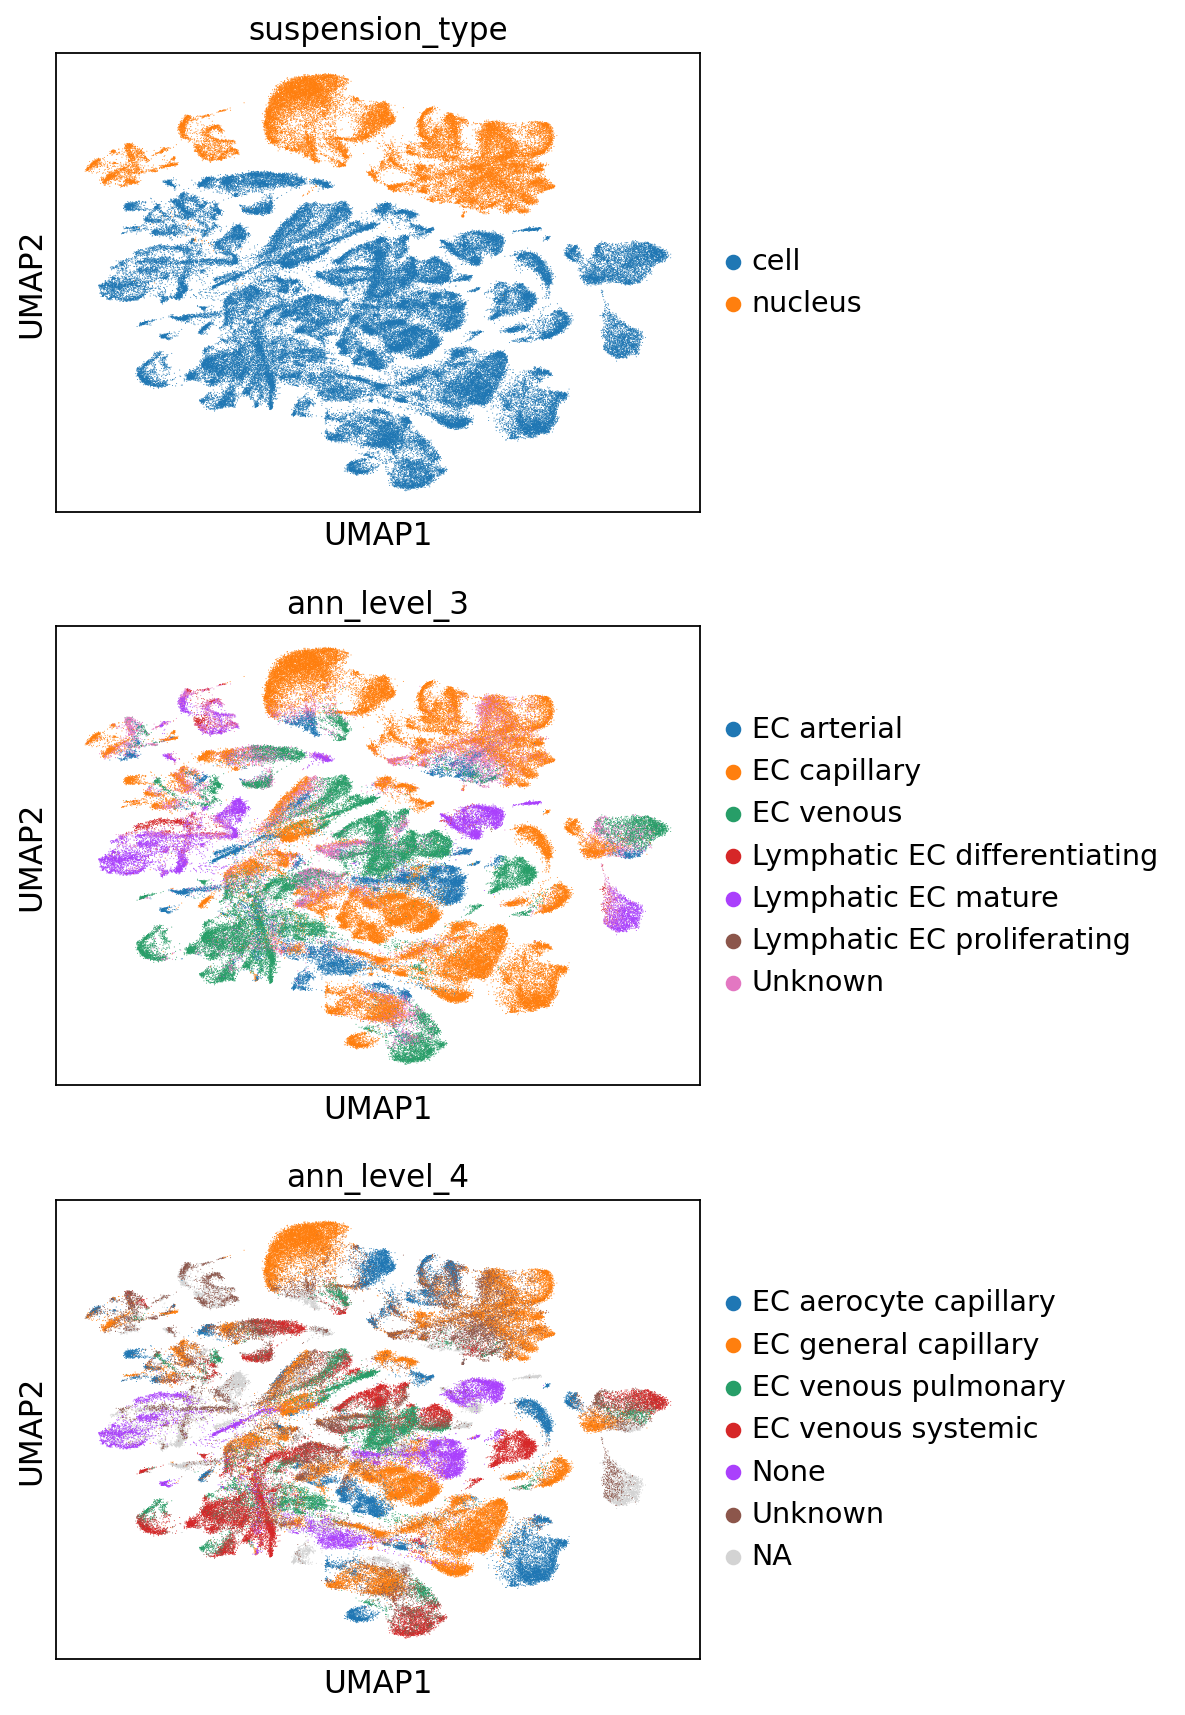

In [20]:
sc.pl.umap(Endocells, color = ["suspension_type","ann_level_3", "ann_level_4"],ncols=1, wspace = 0.4)

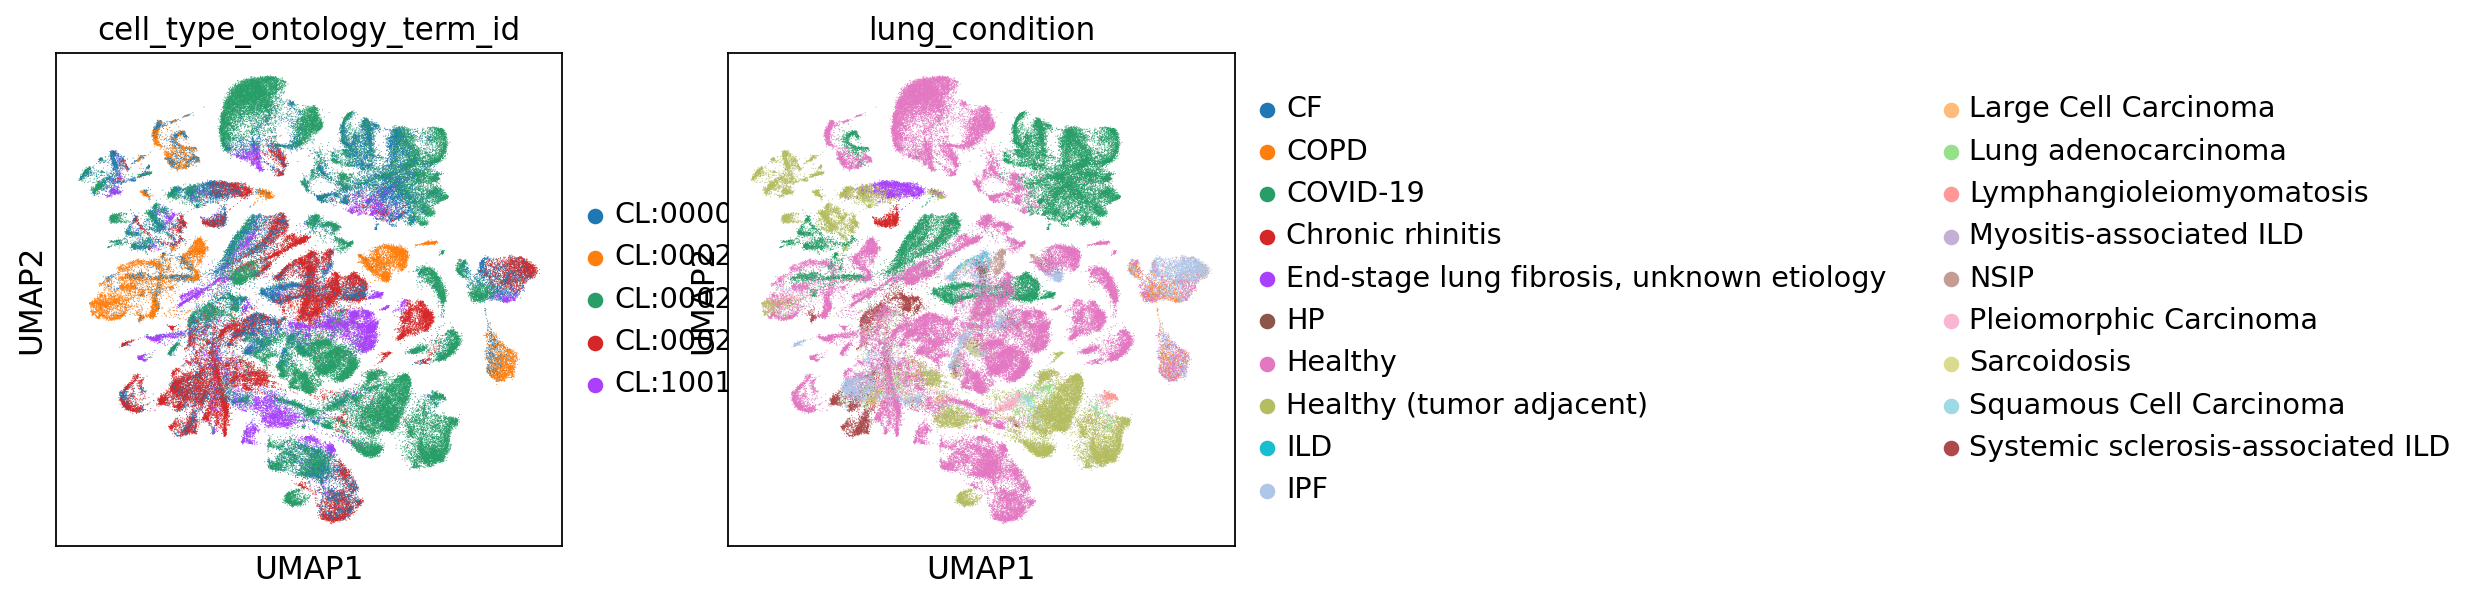

In [25]:
sc.pl.umap(Endocells, color = ["cell_type_ontology_term_id",'lung_condition']) 

In [53]:
Endocells

AnnData object with n_obs × n_vars = 156585 × 56295
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'smoking_status', 'study', 'subject_type', 'tissue_coarse_unharmonized', '

In [50]:
Endocells.var['feature_name'] == 'PLVAP'

ensembl_id
ENSG00000121410    False
ENSG00000268895    False
ENSG00000148584    False
ENSG00000175899    False
ENSG00000245105    False
                   ...  
ENSG00000174903    False
ENSG00000159167    False
ENSG00000136854    False
ENSG00000135605    False
ENSG00000109501    False
Name: feature_name, Length: 56295, dtype: bool

In [14]:
# Assuming you have loaded or created your AnnData object "Endocells"

# Filter the cells with the gene name "STC1"
gene_name_to_filter = ("PLVAP")
filtered_cells = Endocells[:, Endocells.var['feature_name'] == gene_name_to_filter]

# The 'filtered_cells' AnnData object now contains only cells that express the gene 'STC1'
filtered_cells.var

feature_is_filtered original_gene_symbols feature_name  \
ensembl_id                                                                
ENSG00000130300                False                 PLVAP        PLVAP   

                feature_reference feature_biotype  
ensembl_id                                         
ENSG00000130300    NCBITaxon:9606            gene

In [45]:
# Check if the gene called "PLVAP" exists in the AnnData object "Endocells"
gene_symbol_to_check = "A1BG"
if gene_symbol_to_check in Endocells.var['feature_name']:
    print(f"Gene '{gene_symbol_to_check}' exists in the Endocells AnnData object.")
else:
    print(f"Gene '{gene_symbol_to_check}' does not exist in the Endocells AnnData object.")



Gene 'A1BG' does not exist in the Endocells AnnData object.


In [20]:
Endocells.var.original_gene_symbols

AnnData object with n_obs × n_vars = 156585 × 56295
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'smoking_status', 'study', 'subject_type', 'tissue_coarse_unharmonized', '

In [29]:
Endocells.var

feature_is_filtered original_gene_symbols feature_name  \
ensembl_id                                                                
ENSG00000121410                False                  A1BG         A1BG   
ENSG00000268895                False              A1BG-AS1     A1BG-AS1   
ENSG00000148584                False                  A1CF         A1CF   
ENSG00000175899                False                   A2M          A2M   
ENSG00000245105                False               A2M-AS1      A2M-AS1   
...                              ...                   ...          ...   
ENSG00000174903                False                 RAB1B        RAB1B   
ENSG00000159167                False                  STC1         STC1   
ENSG00000136854                False                STXBP1       STXBP1   
ENSG00000135605                False                   TEC          TEC   
ENSG00000109501                False                  WFS1         WFS1   

                feature_reference feature_biotype  
ensembl_id                                         
ENSG00000121410    NCBITaxon:9606            gene  
ENSG00000268895    NCBITaxon:9606            gene  
ENSG00000148584    NCBITaxon:9606            gene  
ENSG00000175899    NCBITaxon:9606            gene  
ENSG00000245105    NCBITaxon:9606            gene  
...                           ...             ...  
ENSG00000174903    NCBITaxon:9606            gene  
ENSG00000159167    NCBITaxon:9606            gene  
ENSG00000136854    NCBITaxon:9606            gene  
ENSG00000135605    NCBITaxon:9606            gene  
ENSG00000109501    NCBITaxon:9606            gene  

[56295 rows x 5 columns]

In [42]:
Endocells.var_names

CategoricalIndex(['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1',
                  'A2ML1-AS1', 'A2ML1-AS2', 'A2MP1', 'A3GALT2',
                  ...
                  'MDM2', 'NLGN1', 'PCK2', 'PKD1', 'PPM1M', 'RAB1B', 'STC1',
                  'STXBP1', 'TEC', 'WFS1'],
                 categories=['5S_rRNA_ENSG00000277411', '5S_rRNA_ENSG00000277488', '5S_rRNA_ENSG00000278457', '5S_rRNA_ENSG00000285609', '5S_rRNA_ENSG00000285626', '5_8S_rRNA_ENSG00000277739', '7SK_ENSG00000271394', '7SK_ENSG00000275933', ...], ordered=False, name='feature_name', dtype='category', length=56295)

In [43]:
Endocells.var_names==Endocells.var.original_gene_symbols

TypeError: Categoricals can only be compared if 'categories' are the same.

In [36]:
Endocells.var_names = new_gene_names_in_correct_order

# The second list can be created by, e.g.:
new_gene_names_in_correct_order = ['newName' if id=='gene A' else id for id in Endocells.var_names]

NameError: name 'new_gene_names_in_correct_order' is not defined

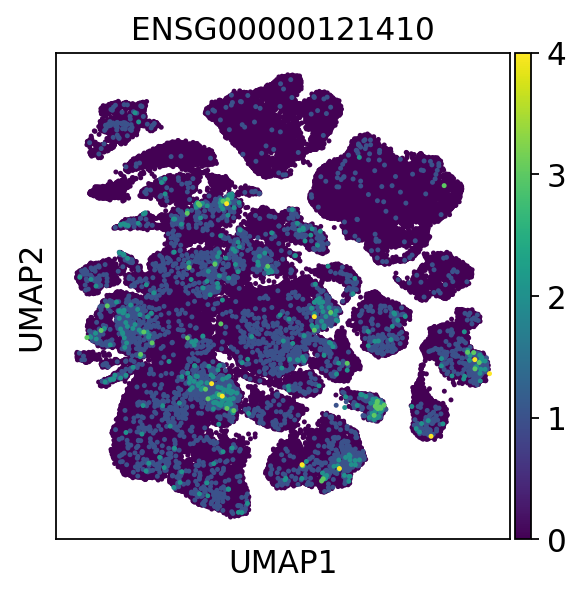

In [44]:
sc.pl.umap(Endocells, color = ["ENSG00000121410"], ncols=2, size=20)

In [16]:
Endocells.X

<156585x56295 sparse matrix of type '<class 'numpy.float32'>'
	with 207960140 stored elements in Compressed Sparse Row format>

In [17]:
Endocells.var.set_index('feature_name', inplace=True)

In [41]:
Endocells.var

feature_is_filtered original_gene_symbols feature_reference  \
feature_name                                                                
A1BG                        False                  A1BG    NCBITaxon:9606   
A1BG-AS1                    False              A1BG-AS1    NCBITaxon:9606   
A1CF                        False                  A1CF    NCBITaxon:9606   
A2M                         False                   A2M    NCBITaxon:9606   
A2M-AS1                     False               A2M-AS1    NCBITaxon:9606   
...                           ...                   ...               ...   
RAB1B                       False                 RAB1B    NCBITaxon:9606   
STC1                        False                  STC1    NCBITaxon:9606   
STXBP1                      False                STXBP1    NCBITaxon:9606   
TEC                         False                   TEC    NCBITaxon:9606   
WFS1                        False                  WFS1    NCBITaxon:9606   

             feature_biotype  
feature_name                  
A1BG                    gene  
A1BG-AS1                gene  
A1CF                    gene  
A2M                     gene  
A2M-AS1                 gene  
...                      ...  
RAB1B                   gene  
STC1                    gene  
STXBP1                  gene  
TEC                     gene  
WFS1                    gene  

[56295 rows x 4 columns]

KeyError: 'A1BG_gene_expression'

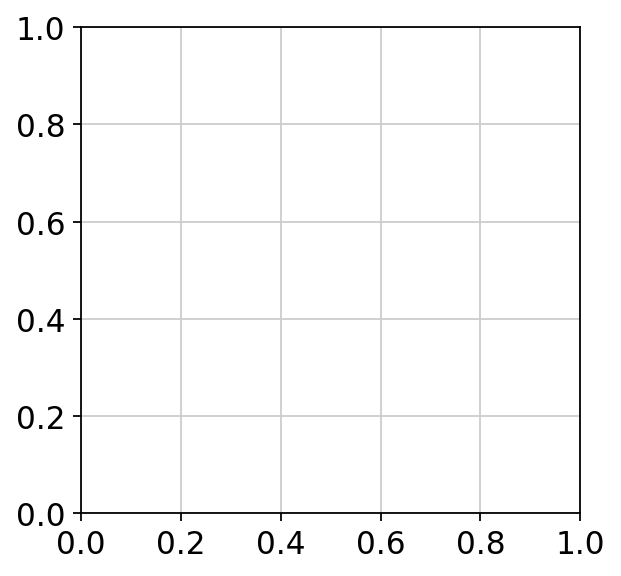

In [79]:
sc.pl.umap(Endocells, color = ["A1BG_gene_expression"], ncols=2, size=20)

KeyError: 'A1BG'

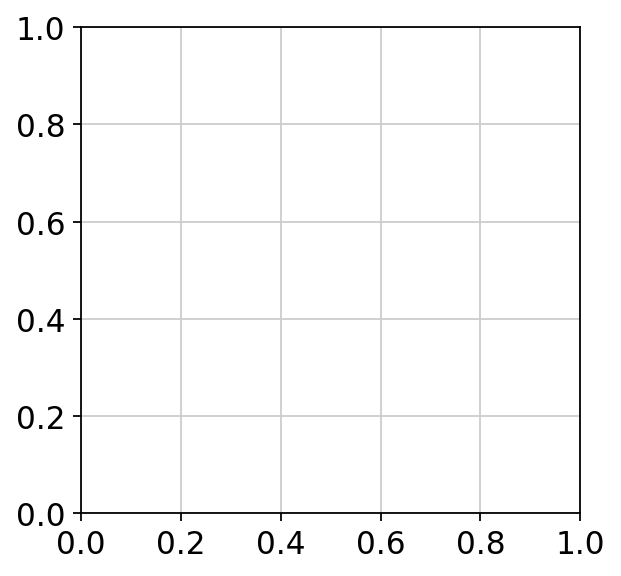

In [37]:
sc.pl.umap(Endocells, color = ["A1BG"], ncols=2, size=20)

In [9]:
pip


Usage:   
  /home/agando/anaconda3/bin/python -m pip <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper command used for command co

In [15]:
pip list

Package                       Version                   Location
----------------------------- ------------------------- ----------------------------------------------------------
absl-py                       0.15.0
adjustText                    0.7.3
affine                        2.3.0
airr                          1.4.1
alabaster                     0.7.12
anndata                       0.8.0                     /home/agando/anaconda3/lib/python3.7/site-packages
anndata2ri                    1.0.2
annoy                         1.16.3
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.1.0
arviz                         0.11.2
asciitree                     0.3.3
astor                         0.8.1
astroid                       2.5.6
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Babel                         2.9.1
backcall                      0.2.0
batchglm              

Note: you may need to restart the kernel to use updated packages.
